# Classification: Logistic Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Data

Note: If you are running this notebook in a standard Python environment use the following lines to import the data. Make sure that the data is saved in the same directory as your Jupyter Notebook.

In [3]:
titanic_train=pd.read_csv('titanic_train.csv')
titanic_test=pd.read_csv('titanic_test.csv')

However, if you are working inside of Google's Colaboratory environment you will need to follow the steps to 1)import the files method as follows: from google.colab import files 2) makes sure you are aware of what folder you have saved the files in, 3) create a variable for you data similiar to the following using the files method:  data=files.upload()

The files.upload() method should propmt you to browse for the files you would like to upload. Once the files are selected, you can use the pd.read_csv() method as illutrated above to import the files.

## Exploratory Data Analysis

In [4]:
#checking head of training data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


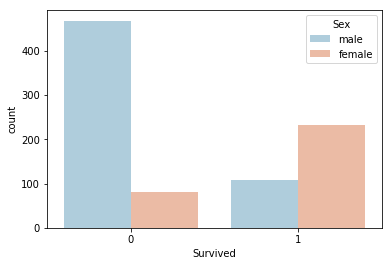

In [7]:
#survivors by sex
sns.countplot(x='Survived',hue='Sex',data=titanic_train,palette='RdBu_r')

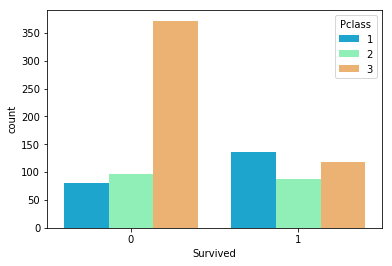

In [8]:
#plotting survivors by passenger class
sns.countplot(x='Survived', hue='Pclass',data=titanic_train,palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Passenger Age')

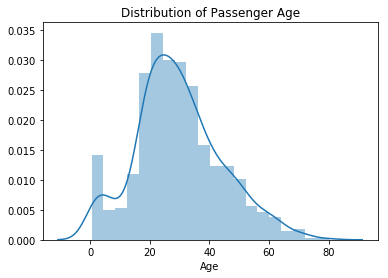

In [9]:
#distribution of passenger age
sns.distplot(titanic_train['Age'].dropna())
plt.title('Distribution of Passenger Age')

In [12]:
#storing ages for survivors and setting non survivors and missing ages to 0
age_survived=np.where(titanic_train['Survived']==1,titanic_train['Age'].fillna(0),0)

Text(0.5, 1.0, 'Distribution of Age for Survivors')

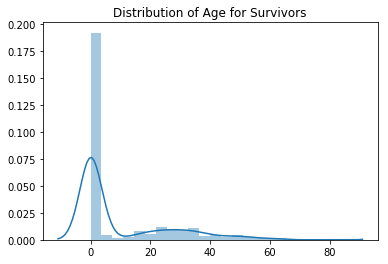

In [11]:
sns.distplot(age_survived)
plt.title('Distribution of Age for Survivors')

## Data Cleaning

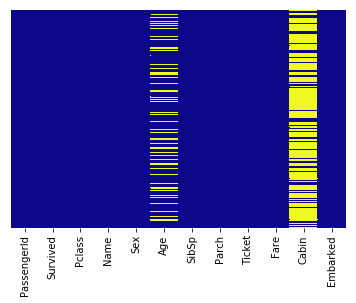

In [13]:
#checking missing values in our data
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [14]:
#Encoding Categorical Features (i.e. because ML model can only read numbers)
sex=pd.get_dummies(titanic_train['Sex'],drop_first=True)
embark=pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [15]:
#dropping unncessary columns
titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [16]:
#rebuiliding training data
titanic_train=pd.concat([titanic_train,sex,embark],axis=1)

In [17]:
#checking updated training data
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [18]:
#dropping cabin column because it has a lot of missing values and we can make inference of cabin via fare column
titanic_train.drop('Cabin',axis=1,inplace=True)

In [19]:
#dropping all other null values
titanic_train.dropna()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0
10,11,1,3,4.0,1,1,16.7000,0,0,1


## Training a Logistic Regession Model

In [20]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test= train_test_split(titanic_train.drop('Survived',axis=1),titanic_train['Survived'],test_size=0.20,random_state=101)

In [22]:
#creating instance of Logistic Regression model
logistic_model=LogisticRegression()

In [23]:
#fitting our model to our training data
logistic_model.fit(X_train.fillna(0),y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
#using our model to make predictions
titanic_predictions=logistic_model.predict(X_test.fillna(0))

In [25]:
#checking the accuracy of our model's predictions
print(f'Logistic Model Classification Report: {classification_report(y_test,titanic_predictions)}')

Logistic Model Classification Report:               precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.85      0.69      0.76        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179

